# Part 1 - Exploratory Data Analysis of user logins

In [1]:
# importing necessary modules
%matplotlib inline
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
# load user logins json file as Pandas dataframe
df = pd.read_json('logins.json', convert_dates=True)
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.4 MB


In [4]:
df.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [5]:
df = df.set_index(df['login_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:13:18 to 1970-04-13 18:54:23
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.4 MB


In [6]:
# initializing count column for timestamps
df['count'] = 1

In [7]:
# resampling and counting for 15min login intervals
log_ct = df.resample('15T').sum()
log_ct.head()

,count
login_time,
1970-01-01 20:00:00,2.0
1970-01-01 20:15:00,6.0
1970-01-01 20:30:00,9.0
1970-01-01 20:45:00,7.0
1970-01-01 21:00:00,1.0


In [8]:
# creating a weekday column
log_ct['weekday'] = log_ct.index.weekday
log_ct.tail()

,count,weekday
login_time,,
1970-04-13 17:45:00,5.0,0
1970-04-13 18:00:00,5.0,0
1970-04-13 18:15:00,2.0,0
1970-04-13 18:30:00,7.0,0
1970-04-13 18:45:00,6.0,0


In [9]:
# creating an hour column
log_ct['hour'] = (pd.DatetimeIndex(log_ct.index).hour)
log_ct.head()

,count,weekday,hour
login_time,,,
1970-01-01 20:00:00,2.0,3,20
1970-01-01 20:15:00,6.0,3,20
1970-01-01 20:30:00,9.0,3,20
1970-01-01 20:45:00,7.0,3,20
1970-01-01 21:00:00,1.0,3,21


In [10]:
log_ct.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 3 columns):
count      9381 non-null float64
weekday    9788 non-null int64
hour       9788 non-null int64
dtypes: float64(1), int64(2)
memory usage: 305.9 KB


In [11]:
# counting NaN values
log_ct.isnull().sum()

count      407
weekday      0
hour         0
dtype: int64

In [12]:
# changing type of the count column
log_ct['count'] = np.nan_to_num(log_ct['count']).astype(int)

In [13]:
# filling Nan values in count w zeros
log_ct['count'].fillna(0).head()

login_time
1970-01-01 20:00:00    2
1970-01-01 20:15:00    6
1970-01-01 20:30:00    9
1970-01-01 20:45:00    7
1970-01-01 21:00:00    1
Freq: 15T, Name: count, dtype: int64

In [14]:
log_ct.describe()

,count,weekday,hour
count,9788.000000,9788.000000,9788.000000
mean,9.515938,3.035554,11.496935
std,8.328818,2.012722,6.922294
min,0.000000,0.000000,0.000000
25%,3.000000,1.000000,5.000000
50%,7.000000,3.000000,11.000000
75%,13.000000,5.000000,17.000000
max,73.000000,6.000000,23.000000


In [15]:
log_ct.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 3 columns):
count      9788 non-null int64
weekday    9788 non-null int64
hour       9788 non-null int64
dtypes: int64(3)
memory usage: 305.9 KB


Text(0.5,0,'Dates')

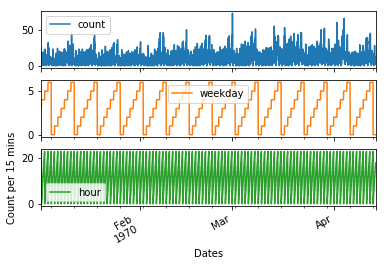

In [16]:
# plotting everything
log_ct.plot(subplots=True)
plt.ylabel('Count per 15 mins')
plt.xlabel('Dates')

In [17]:
# login counts by weekday
log_ct['weekday'].value_counts()

6    1440
5    1440
4    1440
0    1420
3    1360
2    1344
1    1344
Name: weekday, dtype: int64

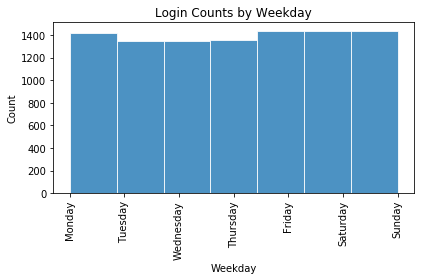

In [18]:
# plotting histogram of login counts by weekday
plt.hist(log_ct['weekday'], alpha=0.8, edgecolor='w', bins=7)
plt.xticks([0,1,2,3,4,5,6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=90)
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.title('Login Counts by Weekday')
plt.tight_layout()
plt.show()

Looks like weekends and Mondays and Fridays are slightly busier than the rest of the week.

In [19]:
# login counts by hour
log_ct['hour'].value_counts()

23    408
15    408
8     408
16    408
1     408
9     408
17    408
2     408
10    408
18    408
3     408
11    408
0     408
4     408
12    408
20    408
5     408
13    408
21    408
6     408
14    408
22    408
7     408
19    404
Name: hour, dtype: int64

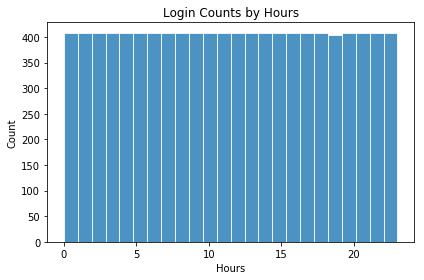

In [20]:
# plotting login counts by hour
plt.hist(log_ct['hour'], alpha=0.8, edgecolor='w', bins=24)
plt.xlabel('Hours')
plt.ylabel('Count')
plt.title('Login Counts by Hours')
plt.tight_layout()
plt.show()

Login counts by hour looks pretty evenly distributed as well.

In [21]:
# finding the outlier
log_ct[log_ct['count'] == 73]

,count,weekday,hour
login_time,,,
1970-03-01 04:30:00,73,6,4


Looks like the outlier highest login count of 73 was on Sunday between 4:30am and 4:45am.

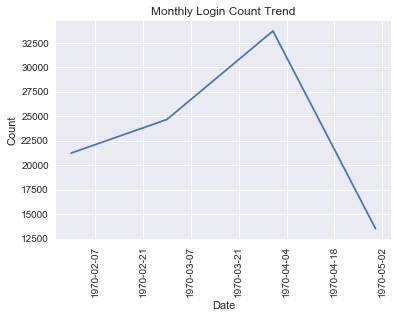

In [22]:
# monthly login count trend 
sns.set()
plt.plot(df['count'].resample('M').sum())
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.xlabel('Date')
plt.title('Monthly Login Count Trend')
plt.show()

Important trend -- It looks like overall user logins peaked at the end of March and been falling steadily since then.

In conclusion, monthly user demand is falling and user login count is very evenly distributed among weekdays and hours of the day which makes me worry about the data quality. It's pretty unlikely to have this kind of evenly distributed hourly user demand. Data quality is definitely a concern here.

# Part 2 - Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

**Answer**

1. The key measure of success would be an increase in number of rides completed per driver. More specifically, drivers should get more rides in usually slow part of the day when driving in their respective cities.

2. I would suggest to do A/B testing where we split our test drivers into two groups where we reimburse one group for the toll and leave the the other as is. I would use null hypothesis (that there is no difference between two groups) to test if the results are truly different rather than pure chance. I would use p-value less than 0.05 as statistically significant to reject the null hypothesis in favor of alternative. If our p-value is indeed statistically significant then we would recommend to the city managers to start the toll reimbursement plan.

# Part 3 ‐ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­term rider retention (again, a few sentences will suffice).

**Data description**

* **city**: city this user signed up in
* **phone**: primary device for this user
* **signup_date**: date of account registration; in the form ‘YYYYMMDD’
* **last_trip_date**: the last time this user completed a trip; in the form ‘YYYYMMDD’
* **avg_dist**: the average distance in miles per trip taken in the first 30 days after signup
* **avg_rating_by_driver**: the rider’s average rating over all of their trips
* **avg_rating_of_driver**: the rider’s average rating of their drivers over all of their trips
* **surge_pct**: the percent of trips taken with surge multiplier > 1
* **avg_surge**: The average surge multiplier over all of this user’s trips
* **trips_in_first_30_days**: the number of trips this user took in the first 30 days after
signing up
* **ultimate_black_user**: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise
* **weekday_pct**: the percent of the user’s trips occurring during a weekday

In [23]:
# load json file as Pandas dataframe
with open("ultimate_data_challenge.json") as f:
    pred_df = json.load(f)

pred_df = pd.DataFrame(pred_df)
pred_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


### 1. Exploratory Data Analysis

In [24]:
pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [25]:
pred_df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [26]:
pred_df['last_trip_date'].max()

'2014-07-01'

In [27]:
pred_df['last_trip_date'].min()

'2014-01-01'

**Data Cleaning**

In [28]:
# replacing missing rating by driver with an average
pred_df['avg_rating_by_driver'].fillna((pred_df['avg_rating_by_driver'].mean()), inplace=True)

In [29]:
# replacing missing rating of driver with an average
pred_df['avg_rating_of_driver'].fillna((pred_df['avg_rating_of_driver'].mean()), inplace=True)

In [30]:
# replacing missing phone types with other
pred_df['phone'].fillna('Other', inplace=True)

In [31]:
pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     50000 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [32]:
# changing data types of date columns
pred_df.last_trip_date = pd.to_datetime(pred_df.last_trip_date)
pred_df.signup_date = pd.to_datetime(pred_df.signup_date)

In [33]:
pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


In [34]:
# setting sign up date as index
pred_df.set_index('signup_date', inplace=True)
pred_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
signup_date,,,,,,,,,,,
2014-01-25,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,15.4,4,True,46.2
2014-01-29,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,0.0,0,False,50.0
2014-01-06,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,0.0,3,False,100.0
2014-01-10,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,20.0,9,True,80.0
2014-01-27,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,11.8,14,False,82.4


In [35]:
pred_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50000 entries, 2014-01-25 to 2014-01-18
Data columns (total 11 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


In [36]:
# changing columns with object type to categorical type
pred_df.city = pred_df.city.astype('category')
pred_df.phone = pred_df.phone.astype('category')
pred_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50000 entries, 2014-01-25 to 2014-01-18
Data columns (total 11 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null category
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null category
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), category(2), datetime64[ns](1), float64(6), int64(1)
memory usage: 3.6 MB


**Data Visualization**

In [37]:
pred_df['city'].value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

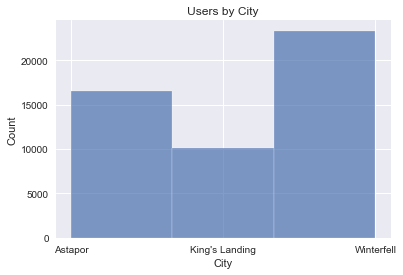

In [38]:
plt.hist(pred_df['city'], bins=3, edgecolor='w', alpha=0.7)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Users by City')
plt.show()

In [39]:
pred_df['avg_rating_of_driver'].value_counts().head()

5.000000    20771
4.601559     8122
4.000000     4193
4.500000     2498
4.800000     2430
Name: avg_rating_of_driver, dtype: int64

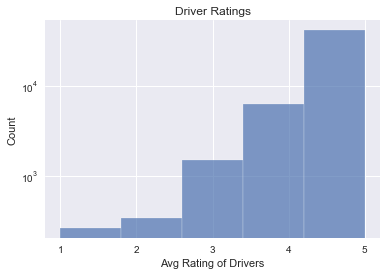

In [40]:
# plotting driver ratings
plt.hist(pred_df['avg_rating_of_driver'], bins=5, edgecolor='w', log=True, alpha=0.7)
plt.xlabel('Avg Rating of Drivers')
plt.ylabel('Count')
plt.title('Driver Ratings')
plt.xticks([1, 2, 3, 4, 5])
plt.show()

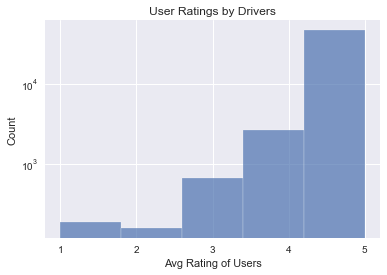

In [41]:
# plotting user ratings
plt.hist(pred_df['avg_rating_by_driver'], bins=5, edgecolor='w', log=True, alpha=0.7)
plt.xlabel('Avg Rating of Users')
plt.ylabel('Count')
plt.title('User Ratings by Drivers')
plt.xticks([1, 2, 3, 4, 5])
plt.show()

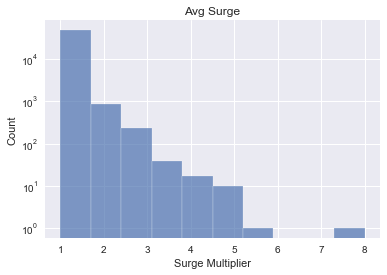

In [42]:
# plotting avg surge
plt.hist(pred_df['avg_surge'], edgecolor='w', alpha=0.7, log=True)
plt.xlabel('Surge Multiplier')
plt.ylabel('Count')
plt.title('Avg Surge')
plt.show()

In [43]:
pred_df['last_trip_date'].head()

signup_date
2014-01-25   2014-06-17
2014-01-29   2014-05-05
2014-01-06   2014-01-07
2014-01-10   2014-06-29
2014-01-27   2014-03-15
Name: last_trip_date, dtype: datetime64[ns]

In [44]:
# last trip date count by month
pred_df['last_trip_date'].dt.month.value_counts()

6    18256
1    10147
5     7585
4     4588
3     4568
2     4308
7      548
Name: last_trip_date, dtype: int64

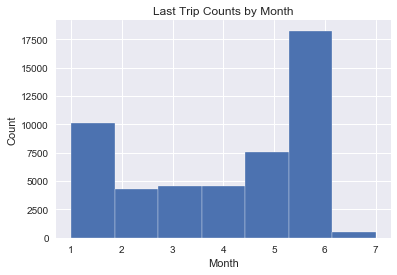

In [45]:
# plotting last trip counts by month
plt.hist(pred_df['last_trip_date'].dt.month, bins=7, edgecolor='w')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Last Trip Counts by Month')
plt.show()

### 2. Predictive Model Building

**Preprocessing**

In [46]:
# creating a column that shows whether the user is active
pred_df['active'] = (pred_df['last_trip_date'].max() - pred_df['last_trip_date']) < timedelta(30)

* False: Not Active
* True: Active

In [47]:
pred_df['active'] = pred_df['active'].astype(int)

In [48]:
pred_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
signup_date,,,,,,,,,,,,
2014-01-25,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,15.4,4,True,46.2,1
2014-01-29,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,0.0,0,False,50.0,0
2014-01-06,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,0.0,3,False,100.0,0
2014-01-10,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,20.0,9,True,80.0,1
2014-01-27,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,11.8,14,False,82.4,0


In [49]:
# 6 month churn rate
churn_6mo = (1 - (pred_df.active.sum() / len(pred_df.active)))
churn_6mo

0.6337999999999999

In [50]:
# 6 month retention rate
retention_6mo = 1 - churn_6mo
retention_6mo

0.3662000000000001

In [51]:
processed_df = pd.get_dummies(pred_df)
processed_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_Other,phone_iPhone
signup_date,,,,,,,,,,,,,,,,
2014-01-25,3.67,5.0,4.7,1.10,2014-06-17,15.4,4,True,46.2,1,0,1,0,0,0,1
2014-01-29,8.26,5.0,5.0,1.00,2014-05-05,0.0,0,False,50.0,0,1,0,0,1,0,0
2014-01-06,0.77,5.0,4.3,1.00,2014-01-07,0.0,3,False,100.0,0,1,0,0,0,0,1
2014-01-10,2.36,4.9,4.6,1.14,2014-06-29,20.0,9,True,80.0,1,0,1,0,0,0,1
2014-01-27,3.13,4.9,4.4,1.19,2014-03-15,11.8,14,False,82.4,0,0,0,1,1,0,0


In [52]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Create arrays for the features and the response variable
y = processed_df['active']
X = processed_df.drop(['active', 'last_trip_date'], axis=1)

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=21)

In [53]:
X.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_Other,phone_iPhone
signup_date,,,,,,,,,,,,,,
2014-01-25,3.67,5.0,4.7,1.10,15.4,4,True,46.2,0,1,0,0,0,1
2014-01-29,8.26,5.0,5.0,1.00,0.0,0,False,50.0,1,0,0,1,0,0
2014-01-06,0.77,5.0,4.3,1.00,0.0,3,False,100.0,1,0,0,0,0,1
2014-01-10,2.36,4.9,4.6,1.14,20.0,9,True,80.0,0,1,0,0,0,1
2014-01-27,3.13,4.9,4.4,1.19,11.8,14,False,82.4,0,0,1,1,0,0


**Decision Tree Classifier**

In [54]:
clf=DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

accuracy=clf.score(X_test,y_test)
print("Decision Tree accuracy",accuracy)
print(classification_report(y_test, y_pred))

Decision Tree accuracy 0.707333333333
             precision    recall  f1-score   support

          0       0.77      0.77      0.77     10435
          1       0.60      0.60      0.60      6065

avg / total       0.71      0.71      0.71     16500



**Logistic Regression Classifier**

In [55]:
# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

#print accuracy score
accuracy = logreg.score(X_test,y_test)
print("Logistic Regression accuracy:",accuracy)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logistic Regression accuracy: 0.722363636364
[[8981 1454]
 [3127 2938]]
             precision    recall  f1-score   support

          0       0.74      0.86      0.80     10435
          1       0.67      0.48      0.56      6065

avg / total       0.71      0.72      0.71     16500



**Random Forest Classifer**

In [56]:
from sklearn.ensemble import RandomForestClassifier

# Create the classifier
clf = RandomForestClassifier()

# Fit the classifier
clf.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = clf.predict(X_test)

# print accuracy score
accuracy = clf.score(X_test,y_test)
print("Random Forest accuracy:",accuracy)

# print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Random Forest accuracy: 0.75303030303
[[8740 1695]
 [2380 3685]]
             precision    recall  f1-score   support

          0       0.79      0.84      0.81     10435
          1       0.68      0.61      0.64      6065

avg / total       0.75      0.75      0.75     16500



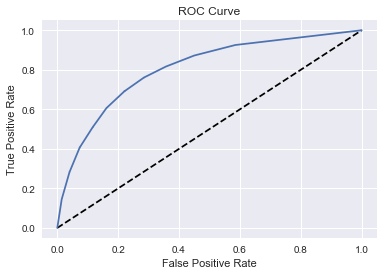

In [57]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = clf.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [58]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)

clf.fit(x_train_res, y_train_res)

# Predict the labels of the test set: y_pred
y_pred = clf.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


[[8587 1848]
 [2283 3782]]
             precision    recall  f1-score   support

          0       0.79      0.82      0.81     10435
          1       0.67      0.62      0.65      6065

avg / total       0.75      0.75      0.75     16500



In [59]:
# print accuracy score
accuracy = clf.score(X_test,y_test)
print("Random Forest w SMOTE accuracy:",accuracy)

Random Forest w SMOTE accuracy: 0.749636363636


It looks like our model performance doesn't improve with SMOTE.

**SVM Classifier**

In [60]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

accuracy=svc.score(X_test,y_test)
print("SVM accuracy:",accuracy)
print(classification_report(y_test, y_pred))

SVM accuracy: 0.766363636364
             precision    recall  f1-score   support

          0       0.79      0.85      0.82     10435
          1       0.71      0.62      0.66      6065

avg / total       0.76      0.77      0.76     16500



For this case, prediction accuracy on would be non-active (*False*) customers is more important to the company because the company is trying to improve the retention rate. Therefore, we should choose a model with highest f1 score for *False* which is the SVM Classifier with f1-score of 82% and recall rate of 85%. 

### 3. Suggestion based on the findings

To improve user retention, the company should target likely to churn customers with marketing campaigns that might offer incentives to use the service. These might be limited time discount offers, simple reminder of the services, new product blurps, etc.